In [1]:
#Loading Libraries & dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df = pd.read_csv('Startup_Scoring_Dataset.csv')
df.head() #Display first 5 rows


,startup_id,team_experience,market_size_million_usd,monthly_active_users,monthly_burn_rate_inr,funds_raised_inr,valuation_inr
0,S001,7,789,66299,6091495,4183839,263247468
1,S002,4,939,34866,9106842,666326,172927107
2,S003,8,42,73630,8817088,649150,313090455
3,S004,5,57,93657,6374167,20153173,305887183
4,S005,7,512,61187,841971,118834,84815222


In [3]:
#Min-Max Scaling (Range 0-1)
df_norm = df.copy() # Create a copy of the original DataFrame to normalize values

# List of features for scoring
features = ['team_experience', 'market_size_million_usd', 'monthly_active_users',
            'monthly_burn_rate_inr', 'funds_raised_inr', 'valuation_inr']

# Invert burn rate so that lower burn is better
df_norm['monthly_burn_rate_inr'] = df_norm['monthly_burn_rate_inr'].max() - df_norm['monthly_burn_rate_inr']

# Apply Min-Max Scaling
scaler = MinMaxScaler()
df_norm[features] = scaler.fit_transform(df_norm[features])
# Show normalized values
print("✅ Normalized data:")
df_norm.head()


✅ Normalized data:


,startup_id,team_experience,market_size_million_usd,monthly_active_users,monthly_burn_rate_inr,funds_raised_inr,valuation_inr
0,S001,0.666667,0.789206,0.669162,0.393230,0.082061,0.518992
1,S002,0.333333,0.941955,0.347274,0.084439,0.011052,0.333843
2,S003,0.777778,0.028513,0.744235,0.114112,0.010706,0.621166
3,S004,0.444444,0.043788,0.949320,0.364283,0.404435,0.606400
4,S005,0.666667,0.507128,0.616813,0.930815,0.000000,0.153220


In [5]:
#Scoring formula
# Assign weights to each feature based on business intuition
weights = {
    'team_experience': 0.15,           # Team experience: 15%
    'market_size_million_usd': 0.20,   # Market size: 20%
    'monthly_active_users': 0.25,      # Traction (users): 25%
    'monthly_burn_rate_inr': 0.10,     # Burn rate (inverted): 10%
    'funds_raised_inr': 0.15,          # Funding: 15%
    'valuation_inr': 0.15              # Valuation: 15%
}

# Compute final score
df_norm['score'] = 0 # Initialize score column to zero

# Multiply each feature by its weight and add to the final score
for feature, weight in weights.items():
    df_norm['score'] += df_norm[feature] * weight

# Scale final score to be out of 100
df_norm['score'] *= 100
# Sort startups by their score in descending order
df_norm = df_norm.sort_values(by='score', ascending=False)
# Reset index after sorting to ensure a clean, consecutive row order
df_norm.reset_index(drop=True, inplace=True)
# Preview scored data
print("🏁 Scored startups:")
df_norm.head()


🏁 Scored startups:


,startup_id,team_experience,market_size_million_usd,monthly_active_users,monthly_burn_rate_inr,funds_raised_inr,valuation_inr,score
0,S006,1.000000,0.409369,0.972689,0.960596,0.985549,0.609569,81.037331
1,S077,0.888889,0.349287,0.871738,0.898704,0.930570,0.799320,77.047933
2,S045,1.000000,0.742363,0.816870,0.267854,0.678663,0.835169,75.655026
3,S033,0.444444,0.868635,0.643919,0.808794,0.992092,0.788628,74.936099
4,S013,0.777778,0.734216,0.843372,0.725233,0.873349,0.459163,74.675295


In [7]:
#Ranking Top & Bottom 10
# Top 10
top_10 = df_norm.head(10)
bottom_10 = df_norm.tail(10)#Bottom 10

print("🔝 Top 10 Startups:")
display(top_10[['startup_id', 'score']])

print("\n🔻 Bottom 10 Startups:")
display(bottom_10[['startup_id', 'score']])


🔝 Top 10 Startups:


,startup_id,score
0,S006,81.037331
1,S077,77.047933
2,S045,75.655026
3,S033,74.936099
4,S013,74.675295
5,S029,73.114982
6,S097,70.037973
7,S012,69.810579
8,S008,69.671483
9,S043,69.554850



🔻 Bottom 10 Startups:


,startup_id,score
90,S074,33.662372
91,S017,33.527899
92,S061,32.964227
93,S051,32.321262
94,S079,30.430187
95,S084,30.144740
96,S058,28.567332
97,S023,26.262269
98,S098,26.158777
99,S055,19.094732


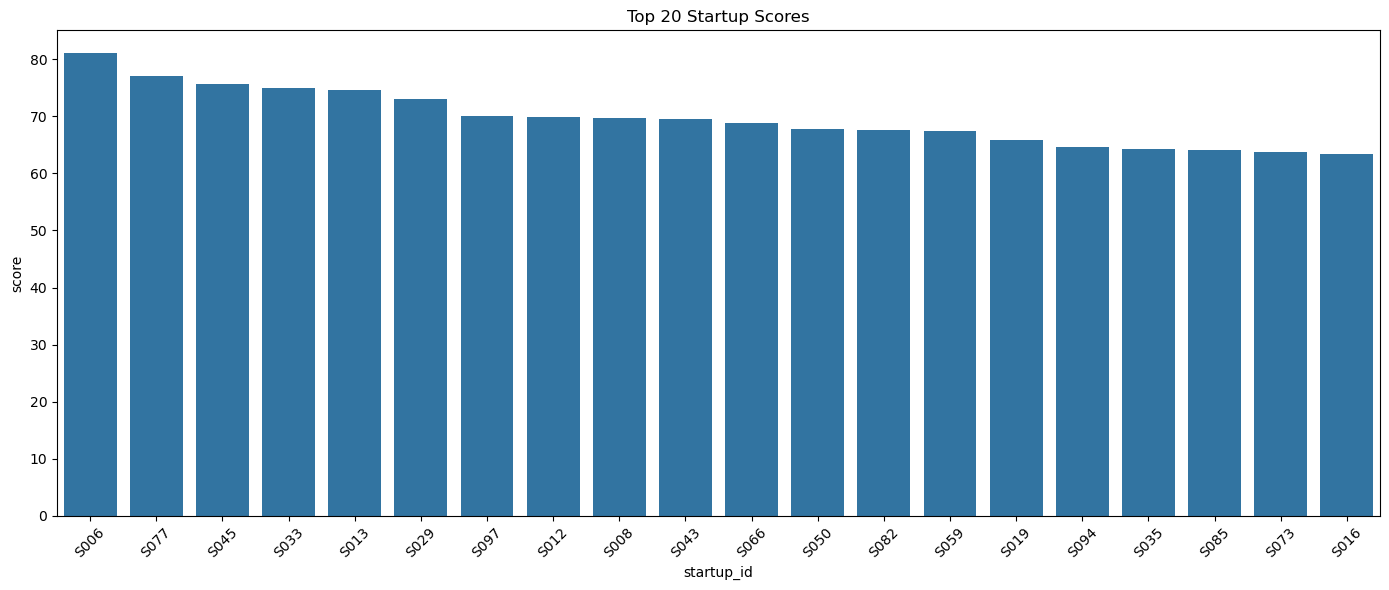

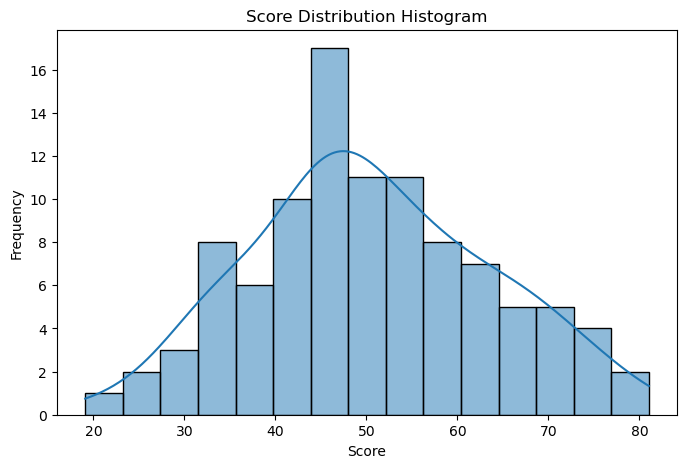

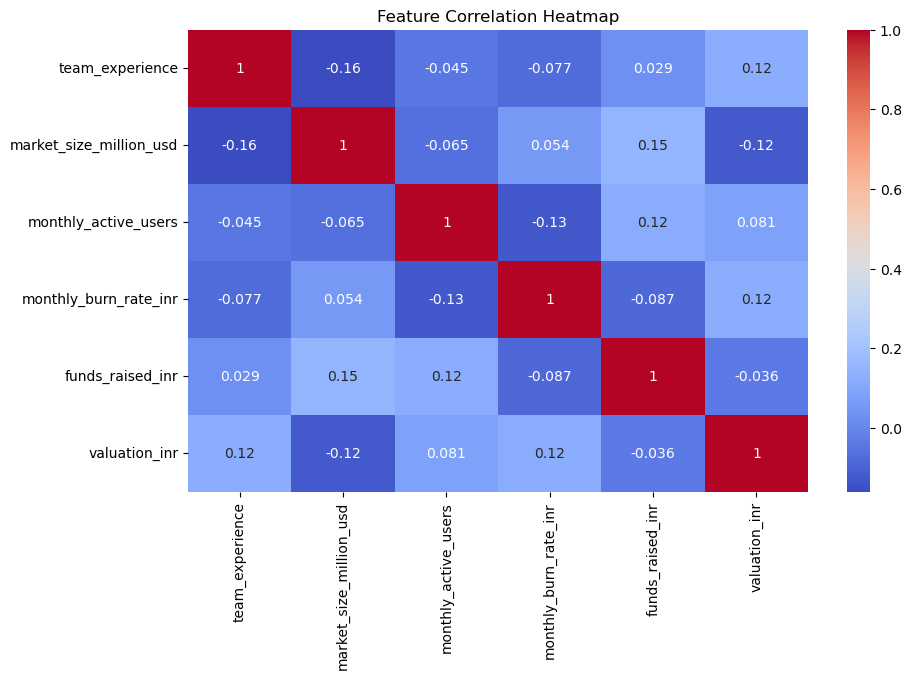

In [9]:
#Visulization
# Bar Chart - Top 20 Startup Scores
plt.figure(figsize=(14, 6))
sns.barplot(x='startup_id', y='score', data=df_norm.sort_values(by='score', ascending=False).head(20))
plt.xticks(rotation=45)
plt.title('Top 20 Startup Scores')
plt.tight_layout()
#Save image
plt.savefig("C:/Users/smara/Downloads/startup_scoring/outputs/top_bottom_bar_chart.png")
plt.show()

# Histogram of Score Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df_norm['score'], kde=True, bins=15)
plt.title('Score Distribution Histogram')
plt.xlabel('Score')
plt.ylabel('Frequency')
# Option 2: Use forward slashes
plt.savefig("C:/Users/smara/Downloads/startup_scoring/outputs/score_distribution.png")
plt.show()

# Correlation Heatmap between Original Features (Not Normalized)
plt.figure(figsize=(10, 6))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
# Option 2: Use forward slashes
plt.savefig("C:/Users/smara/Downloads/startup_scoring/outputs/correlation_heatmap.png")
plt.show()


In [21]:
# Save the scored startups to a CSV for sharing or future use
df_norm[['startup_id', 'score']].to_csv("C:/Users/smara/Downloads/startup_scoring/outputs/final_scores.csv", index=False)
print("✅ Final scores saved to outputs/final_scores.csv")

✅ Final scores saved to outputs/final_scores.csv


In [21]:
from sklearn.ensemble import RandomForestRegressor  # Importing Random Forest Regressor model
from sklearn.model_selection import train_test_split  # For splitting dataset into training and testing sets
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Evaluation metrics
import matplotlib.pyplot as plt  # For plotting
import numpy as np  # For numerical operations

# Define feature columns and the target column for modeling
features = ['team_experience', 'market_size_million_usd', 'monthly_active_users',
            'monthly_burn_rate_inr', 'funds_raised_inr', 'valuation_inr']
target = 'score'  # The target variable we want to predict

# Splitting the data into features (X) and target (y)
X = df_norm[features]  # Selecting feature columns from the normalized DataFrame
y = df_norm[target]    # Selecting the target column

# Splitting data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Random Forest Regressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)  # Fitting the model on training data

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)           # Mean Absolute Error
r2 = r2_score(y_test, y_pred)                       # R² Score (coefficient of determination)

# Printing out model evaluation metrics
print(f" Evaluation Metrics:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")


 Evaluation Metrics:
RMSE: 6.21
MAE: 5.14
R² Score: 0.76


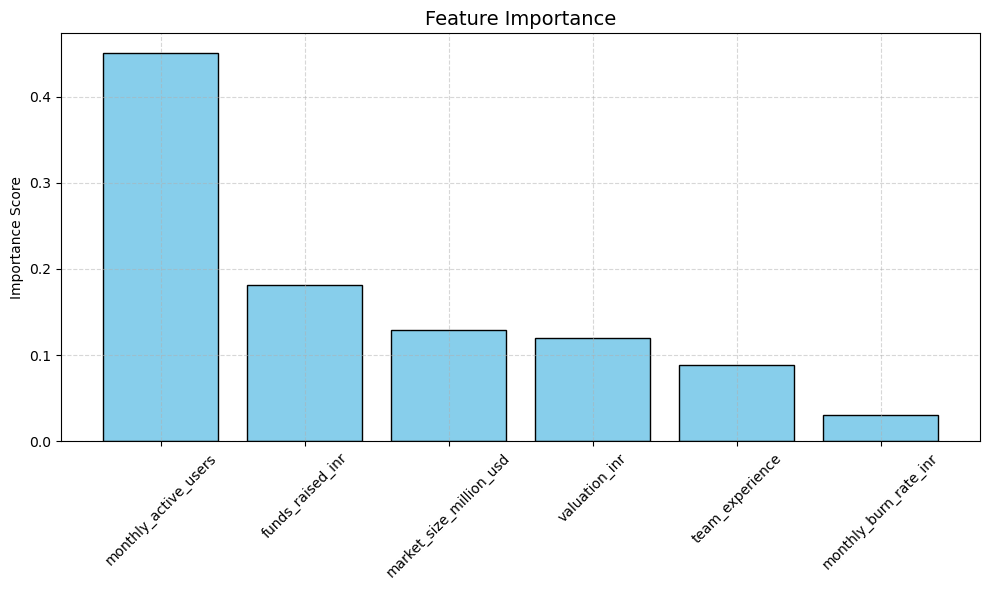

In [23]:
# Feature Importance Plot

# Extracting feature importance scores from the trained Random Forest model
importances = model.feature_importances_

# Getting the indices of features sorted by importance (in descending order)
indices = np.argsort(importances)[::-1]

# Creating a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))  # Set the size of the plot
plt.title("Feature Importance", fontsize=14)  # Title for the plot

# Drawing bars: each bar corresponds to a feature's importance
plt.bar(range(len(features)), importances[indices], color="skyblue", edgecolor='black')

# Labeling the x-axis with feature names, rotated for better readability
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=45)

# Labeling the y-axis
plt.ylabel("Importance Score")

# Adjusting layout and grid for visual clarity
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)

# Displaying the plot
plt.show()
